In [4]:
import FileHandler
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

with open(FileHandler.MIDILABS_RESULTS_PATHS['bar'], 'r') as read_file:
    all_results = read_file.readlines()
    
songs = dict()
    
for row_nr in range(len(all_results)):
    row_content = all_results[row_nr].rstrip().split(';')
    if float(row_content[3]) < 0.85:
        song_key = int(row_content[0])
        if song_key in songs:
            songs[song_key].append([float(row_content[4]), float(row_content[5])])
        else:
            songs[song_key] = [[float(row_content[4]), float(row_content[5])]]

nomidi = set()
for row_nr in range(len(all_results)):
    row_content = all_results[row_nr].rstrip().split(';')
    if int(row_content[0]) not in songs:
        nomidi.add(int(row_content[0]))
print nomidi

set([67, 138, 171, 114, 163, 150, 87, 28])


(0.5979819477647743, 4.456968809930503e-56)
(0.5979819477647743, 4.456968809930503e-56)


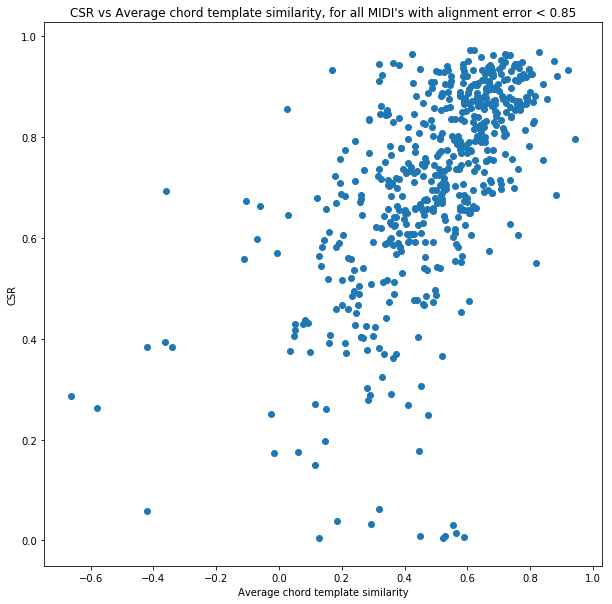

In [22]:
all_est = []
all_csr = []
for song_key in songs:
    for midi in songs[song_key]:
        all_est.append(midi[0])
        all_csr.append(midi[1])
        
print ss.pearsonr(all_est, all_csr)

plt.figure(figsize=(10,10))
plt.scatter(all_est, all_csr)
plt.title('CSR vs Average chord template similarity, for all MIDI\'s with alignment error < 0.85')
plt.xlabel('Average chord template similarity')
plt.ylabel('CSR')
plt.show()

565
565
102
(0.29134876626705436, 1.6206012742234894e-12)


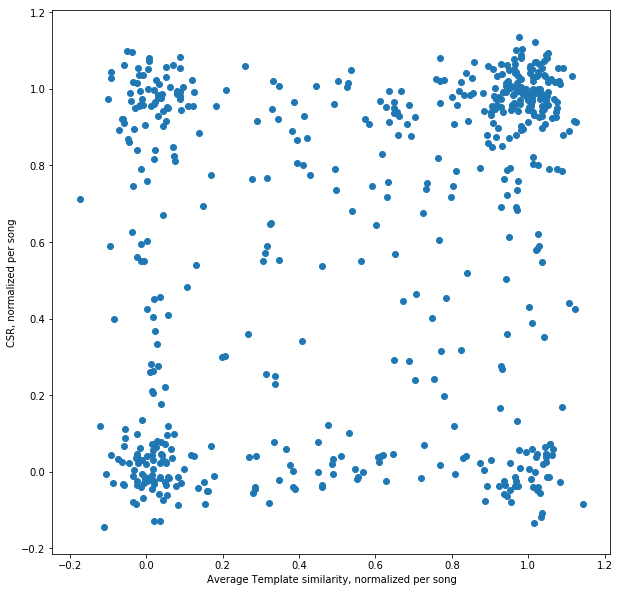

In [21]:
all_est = []
all_csr = []
        
for song_key in songs:
    worst_est_i = np.min([x[0] for x in songs[song_key]])
    best_est_i = np.max([x[0] for x in songs[song_key]])
    
    worst_csr_i = np.min([x[1] for x in songs[song_key]])
    best_csr_i = np.max([x[1] for x in songs[song_key]])
    
    for midi in songs[song_key]:
        if midi[0] == best_est_i:
            e = 1
        else:
            e = (midi[0] - worst_est_i) / (best_est_i - worst_est_i)
        if midi[1] == best_csr_i:
            c = 1
        else:
            c = (midi[1] - worst_csr_i) / (best_csr_i - worst_csr_i)
        all_est.append(e)
        all_csr.append(c)
print len(all_est)
print len(all_csr)
c = 0
for i in range(len(all_est)):
    if all_est[i] == 1 and all_csr[i] == 1:
        c += 1
print c

def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

print ss.pearsonr(all_est, all_csr)
       
plt.figure(figsize=(10,10))
plt.scatter(rand_jitter(all_est), rand_jitter(all_csr))
plt.xlabel('Average Template similarity, normalized per song')
plt.ylabel('CSR, normalized per song')
plt.show()

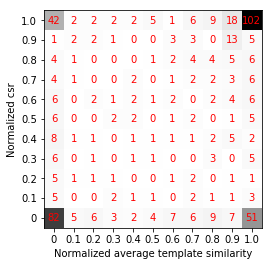

In [11]:
nb = 10
bins = np.linspace(0, 1, nb + 1)
matrix = np.zeros((nb + 1, nb + 1), dtype=int)
for i in range(len(all_est)):
    x = int(nb * all_est[i])
    y = int(nb * all_csr[i])
    matrix[x,y] += 1
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap='Greys', interpolation='nearest', origin='lower')
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        text = ax.text(j,i, matrix[i, j],
                       ha="center", va="center", color="r")
ax.set_xticks(range(nb + 1))
ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticks(range(nb + 1))
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xlabel('Normalized average template similarity')
ax.set_ylabel('Normalized csr')
plt.show()

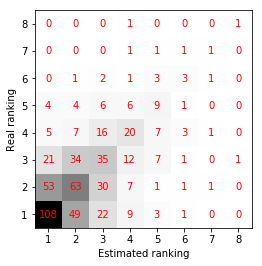

In [12]:
import scipy.stats as ss

all_est = []
all_csr = []
        
for song_key in songs:
    est_ranking = ss.rankdata([x[0] for x in songs[song_key]])
    csr_ranking = ss.rankdata([x[1] for x in songs[song_key]])
    for midi in range(len(songs[song_key])):
        all_est.append(int(est_ranking[midi]))
        all_csr.append(int(csr_ranking[midi]))
        
matrix = np.zeros((np.max(all_est) + 1, np.max(all_csr) + 1), dtype=int)
for i in range(len(all_est)):
    matrix[all_est[i], all_csr[i]] += 1
    
fig, ax = plt.subplots()
im = ax.imshow(matrix[1:,1:], cmap='Greys', interpolation='nearest', origin='lower')
ax.set_xticks(range(np.max(all_est)))
ax.set_yticks(range(np.max(all_csr)))
ax.set_xticklabels(range(1, np.max(all_est) + 1))
ax.set_yticklabels(range(1, np.max(all_csr) + 1))
for i in range(1, np.max(all_est) + 1):
    for j in range(1, np.max(all_csr) + 1):
        text = ax.text(j - 1, i - 1, matrix[i, j],
                       ha="center", va="center", color="r")
ax.set_xlabel('Estimated ranking')
ax.set_ylabel('Real ranking')
plt.show()
        
# plt.figure(figsize=(10,10))
# plt.scatter(all_est, all_csr)
# plt.xlabel('Average Template similarity, normalized per song')
# plt.ylabel('CSR, normalized per song')
# plt.show()

In [24]:
all_est = []
all_csr = []
differences = []
        
for song_key in songs:
    best_csr_i = np.argmax([x[1] for x in songs[song_key]])
    best_est_i = np.argmax([x[0] for x in songs[song_key]])
    csr_best_csr = songs[song_key][best_csr_i][1]
    csr_best_est = songs[song_key][best_est_i][1]
    all_est.append(csr_best_est)
    all_csr.append(csr_best_csr)
    differences.append(csr_best_csr - csr_best_est)
    if csr_best_csr - csr_best_est > 0.5:
        print song_key

106


(0.9135884769726935, 8.762828471337059e-76)


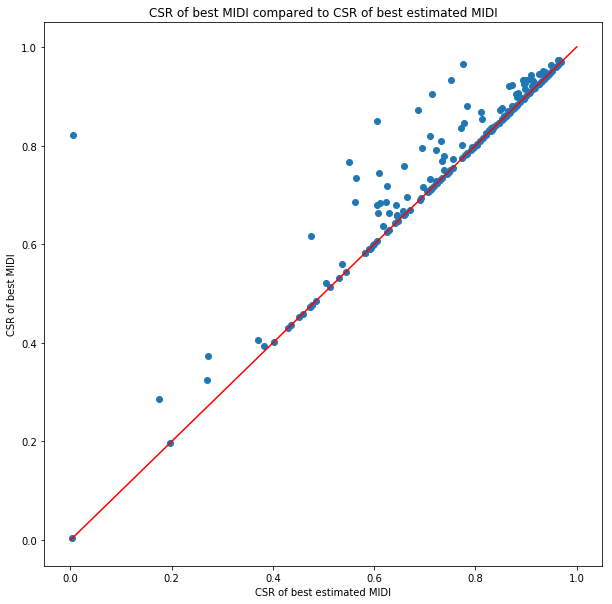

In [25]:
print ss.pearsonr(all_est, all_csr)

plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1], c='red')
plt.scatter(all_est, all_csr)
plt.title('CSR of best MIDI compared to CSR of best estimated MIDI')
plt.xlabel('CSR of best estimated MIDI')
plt.ylabel('CSR of best MIDI')
plt.show()

176
191


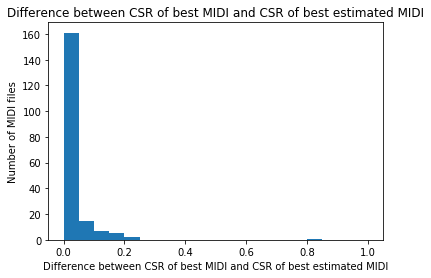

In [29]:
print len([x for x in differences if x < 0.1])
print len(songs)

plt.hist(differences, bins = np.linspace(0.0, 1.0, num=21, endpoint=True))
plt.title('Difference between CSR of best MIDI and CSR of best estimated MIDI')
plt.xlabel('Difference between CSR of best MIDI and CSR of best estimated MIDI')
plt.ylabel('Number of MIDI files')
plt.show()

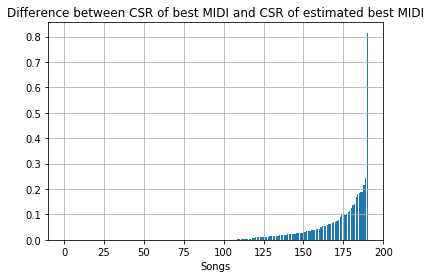

In [19]:
d = sorted(differences)
plt.bar(range(len(d)), d)
plt.xlabel('Songs')
plt.title('Difference between CSR of best MIDI and CSR of estimated best MIDI')
plt.grid()

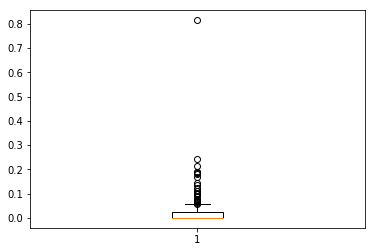

In [21]:
plt.boxplot(differences)
plt.show()